<img src="logoINPE.png">

# Clustering - Kmeans

Importando bibliotecas

In [1]:
import gsidiag as gd
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Definindo parâmetros para o uso do readDiag

In [2]:
#DIRdiag = "/home/patrick/readDiag/data"
DIRdiag = "/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout"
#D:\ftp1.cptec.inpe.br\pesquisa\das\joao.gerd\EXP18\GSI\dataout
varName = "amsua"
varType = "n15"
dateIni="2020010100" 
dateFin="2020010506" 
nHour = "6"          
vminOMA = -2.0       
vmaxOMA = 2.0        
vminSTD = 0.0        
vmaxSTD = 14.0       
Level = 1000
Lay = None           
SingleL = "All" 

datei = datetime.strptime(str(dateIni), "%Y%m%d%H")
datef = datetime.strptime(str(dateFin), "%Y%m%d%H")
dates = [dates.strftime('%Y%m%d%H') for dates in pd.date_range(datei, datef,freq="6H").tolist()]

print(dates)


['2020010100', '2020010106', '2020010112', '2020010118', '2020010200', '2020010206', '2020010212', '2020010218', '2020010300', '2020010306', '2020010312', '2020010318', '2020010400', '2020010406', '2020010412', '2020010418', '2020010500', '2020010506']


Encontrando e listando arquivos para serem usados

In [3]:
paths, pathsc = [], []

OuterL = "01"        
[paths.append(DIRdiag+"/"+dt+"/diag_amsua_n15_"+OuterL+"."+dt) for dt in dates]

OuterLc = "03"
[pathsc.append(DIRdiag+"/"+dt+"/diag_amsua_n15_"+OuterLc+"."+dt) for dt in dates]

print(paths)
print("")
print(pathsc)

['/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010100/diag_amsua_n15_01.2020010100', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010106/diag_amsua_n15_01.2020010106', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010112/diag_amsua_n15_01.2020010112', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010118/diag_amsua_n15_01.2020010118', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010200/diag_amsua_n15_01.2020010200', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010206/diag_amsua_n15_01.2020010206', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010212/diag_amsua_n15_01.2020010212', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010218/diag_amsua_n15_01.2020010218', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010300/diag_amsua_n15_01.2020010300', '/mnt/d/f

Lendo arquivos listado usando o readDiag e concatenando os dados

In [4]:
# Define uma variável booleana 'read' como True para indicar que a leitura dos arquivos será realizada
read = True

# Verifica se 'read' é True para prosseguir com a leitura dos arquivos
if read:        
    # Inicializa uma lista vazia para armazenar os objetos gdf
    gdf_list = []
    # Imprime uma mensagem informando o tempo estimado necessário para a leitura dos arquivos
    print("")
    print("Aguarde, o tempo total estimado para a leitura dos arquivos é de "+
          str(int((float(len(paths))*20 )/60))+" minutos e "+
          str(int((float(len(paths))*20 )%60))+" segundos.")
    print("")
    # Itera sobre os caminhos dos arquivos e seus caminhos de configuração correspondentes
    for path, pathc in zip(paths,pathsc):
        # Imprime uma mensagem indicando o arquivo que está sendo lido
        print("Reading "+path)
        # Lê o arquivo usando a função read_diag do módulo gsidiag e armazena o objeto retornado em gdf
        gdf = gd.read_diag(path,pathc)
        # Adiciona o objeto gdf à lista gdf_list
        gdf_list.append(gdf)

    # Imprime a lista de objetos gdf lidos
    print(gdf_list)
    
    # Define uma string separadora para uso posterior
    separator = " ====================================================================================================="



Aguarde, o tempo total estimado para a leitura dos arquivos é de 6 minutos e 0 segundos.

Reading /mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010100/diag_amsua_n15_01.2020010100
 
>>> GSI DIAG <<<
 
Reading /mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010106/diag_amsua_n15_01.2020010106
 
>>> GSI DIAG <<<
 
Reading /mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010112/diag_amsua_n15_01.2020010112
 
>>> GSI DIAG <<<
 
Reading /mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010118/diag_amsua_n15_01.2020010118
 
>>> GSI DIAG <<<
 
Reading /mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010200/diag_amsua_n15_01.2020010200
 
>>> GSI DIAG <<<
 
Reading /mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010206/diag_amsua_n15_01.2020010206
 
>>> GSI DIAG <<<
 
Reading /mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010212/diag_am

In [5]:
# Inicialização de DataFrame vazio para armazenar dados concatenados
df_concatenado2 = pd.DataFrame()

# Iteração sobre objetos em gdf_list
for objeto in gdf_list:
        
    print(separator)
    print("Separando dados do arquivo" + str(objeto._diagFile))
    
    # Criação de dicionário de dados a partir do objeto   
    dados_dict = {
            'lat': objeto.obsInfo[varName].loc[varType].lat,
            'lon': objeto.obsInfo[varName].loc[varType].lon,
            'elev': objeto.obsInfo[varName].loc[varType].elev,
            'nchan': objeto.obsInfo[varName].loc[varType].nchan,
            'time': objeto.obsInfo[varName].loc[varType].time,
            'iuse': objeto.obsInfo[varName].loc[varType].iuse,
            'idqc': objeto.obsInfo[varName].loc[varType].idqc,
            'inverr': objeto.obsInfo[varName].loc[varType].inverr,
            'oer': objeto.obsInfo[varName].loc[varType].oer,
            'obs': objeto.obsInfo[varName].loc[varType].obs,
            'omf': objeto.obsInfo[varName].loc[varType].omf,
            'omf_nobc': objeto.obsInfo[varName].loc[varType].omf_nobc,
            'emiss': objeto.obsInfo[varName].loc[varType].emiss,
            'oma': objeto.obsInfo[varName].loc[varType].oma,
            'oma_nobc': objeto.obsInfo[varName].loc[varType].oma_nobc,
            'imp': objeto.obsInfo[varName].loc[varType].imp,
            'dfs': objeto.obsInfo[varName].loc[varType].dfs
            }
        
    # Conversão do dicionário em DataFrame
    df_objeto = pd.DataFrame(dados_dict)
        
    # Concatenação do DataFrame do objeto com o DataFrame concatenado
    df_concatenado2 = pd.concat([df_concatenado2, df_objeto], ignore_index=True)
    

Separando dados do arquivo/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010100/diag_amsua_n15_01.2020010100
Separando dados do arquivo/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010106/diag_amsua_n15_01.2020010106
Separando dados do arquivo/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010112/diag_amsua_n15_01.2020010112
Separando dados do arquivo/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010118/diag_amsua_n15_01.2020010118
Separando dados do arquivo/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010200/diag_amsua_n15_01.2020010200
Separando dados do arquivo/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010206/diag_amsua_n15_01.2020010206
Separando dados do arquivo/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010212/diag_amsua_n15_01.2020010212
Separando dados do arquivo/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao

In [6]:
# Remoção de linhas com valores NaN
df_concatenado2.dropna(inplace=True)

# Filtrando os canais sub-representados
df_concatenado2 = df_concatenado2[~df_concatenado2['nchan'].isin([1, 2, 3, 4, 5, 6, 15])]

print(df_concatenado2)

print(separator)

               lat         lon         elev  nchan      time  iuse  idqc  \
6       -87.504501   19.704599  2735.045410    7.0  0.315833   1.0   0.0   
7       -87.504501   19.704599  2735.045410    8.0  0.315833   1.0   0.0   
8       -87.504501   19.704599  2735.045410    9.0  0.315833   1.0   0.0   
9       -87.504501   19.704599  2735.045410   10.0  0.315833   1.0   0.0   
11      -87.504501   19.704599  2735.045410   12.0  0.315833   1.0   0.0   
...            ...         ...          ...    ...       ...   ...   ...   
2103637 -60.779900  358.270294    -0.046764    8.0 -0.758333   1.0   0.0   
2103638 -60.779900  358.270294    -0.046764    9.0 -0.758333   1.0   0.0   
2103639 -60.779900  358.270294    -0.046764   10.0 -0.758333   1.0   0.0   
2103641 -60.779900  358.270294    -0.046764   12.0 -0.758333   1.0   0.0   
2103642 -60.779900  358.270294    -0.046764   13.0 -0.758333   1.0   0.0   

           inverr       oer         obs       omf  omf_nobc     emiss  \
6        3.996

In [7]:
#from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [8]:
atributos = ["nchan", "imp", "dfs"]
df_dados = df_concatenado2[atributos].copy()

n_clusters = 2  # Número de clusters desejados
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_dados['cluster'] = kmeans.fit_predict(df_dados.drop('nchan', axis=1))

print(df_dados)

         nchan       imp       dfs  cluster
6          7.0  0.016040  0.006990        0
7          8.0 -0.001841 -0.001525        0
8          9.0  0.006298  0.002950        0
9         10.0 -0.025374 -0.013614        0
11        12.0  0.150416  0.050466        0
...        ...       ...       ...      ...
2103637    8.0 -0.019509 -0.018963        0
2103638    9.0  0.012506 -0.020273        0
2103639   10.0 -0.122462 -0.067309        0
2103641   12.0  0.059403  0.016725        0
2103642   13.0 -0.359791 -0.403504        0

[840978 rows x 4 columns]


In [9]:
from roughsets_base.roughset_dt import RoughSetDT

In [10]:
rs_dt = RoughSetDT(df_dados[['dfs']].copy(), y=df_dados['cluster'])
print(rs_dt)

# Chame a função get_approximation_indices com os conceitos e o subconjunto de colunas
lower_approx, boundary_region, upper_approx, negative_region = rs_dt.get_approximation_indices(concepts=None, subset=None)

# Agora você pode usar os resultados conforme necessário
print("Lower Approximation Indices:", lower_approx)
print("Boundary Region Indices:", boundary_region)
print("Upper Approximation Indices:", upper_approx)
print("Negative Region Indices:", negative_region)

Lower Approximation Indices: Index([      6,       7,       8,       9,      11,      12,      21,      22,
            23,      24,
       ...
       2103623, 2103624, 2103626, 2103627, 2103636, 2103637, 2103638, 2103639,
       2103641, 2103642],
      dtype='int64', length=840934)
Boundary Region Indices: Index([ 100823,  112418,  117147,  154496,  276596,  276821,  486687,  531342,
        652601,  664992,  667286,  687192,  728802,  759432,  765462,  774237,
        778881,  826506,  845497,  926292,  938771,  952151, 1057674, 1193696,
       1217772, 1235798, 1237028, 1241187, 1453792, 1470621, 1541036, 1608597,
       1633766, 1724636, 1743549, 1758266, 1837722, 1859001, 1879587, 1962582,
       1996917, 2010791, 2032752, 2076642],
      dtype='int64')
Upper Approximation Indices: Index([      6,       7,       8,       9,      11,      12,      21,      22,
            23,      24,
       ...
       2103623, 2103624, 2103626, 2103627, 2103636, 2103637, 2103638, 2103639,
       

In [11]:
# Obter as linhas do DataFrame original que estão na Boundary Region
boundary_df = df_dados.loc[boundary_region]

# Contar a frequência dos canais na Boundary Region
boundary_channels = boundary_df['nchan'].value_counts()
print("Frequency of Channels in Boundary Region:")
print(boundary_channels)

Frequency of Channels in Boundary Region:
nchan
13.0    19
12.0    13
9.0      4
7.0      4
8.0      2
10.0     2
Name: count, dtype: int64


In [12]:
# Obter as linhas do DataFrame original que estão no Lower Approximation
lower_df = df_dados.loc[lower_approx]

# Contar a frequência dos canais no Lower Approximation
lower_channels = lower_df['nchan'].value_counts()

print("Canais consistentes:")
print(lower_channels)

Canais consistentes:
nchan
8.0     140239
9.0     140236
10.0    140235
12.0    140147
7.0     140091
13.0    139986
Name: count, dtype: int64


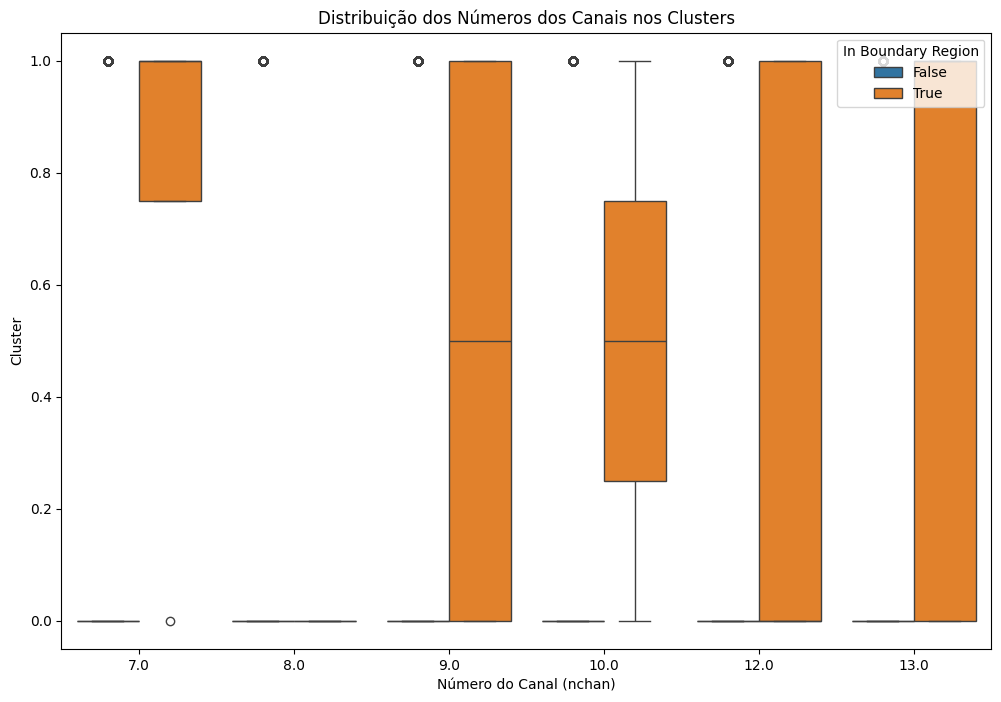

In [13]:
# Adicionar uma coluna que indica se a amostra está na Boundary Region
df_dados['in_boundary'] = df_dados.index.isin(boundary_region)

# Plotar um boxplot para visualizar a distribuição dos canais nos clusters e na Boundary Region
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_dados, x='nchan', y='cluster', hue='in_boundary')
plt.title('Distribuição dos Números dos Canais nos Clusters')
plt.xlabel('Número do Canal (nchan)')
plt.ylabel('Cluster')
plt.legend(title='In Boundary Region', loc='upper right')
plt.show()

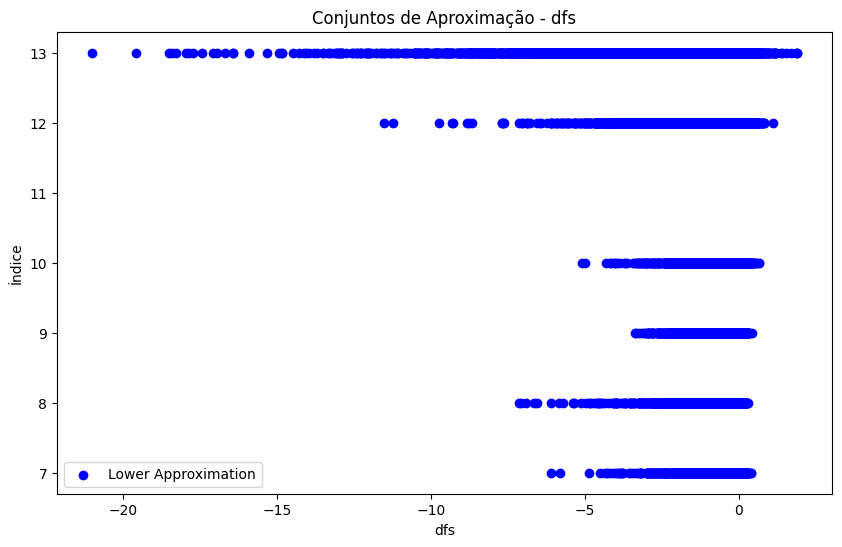

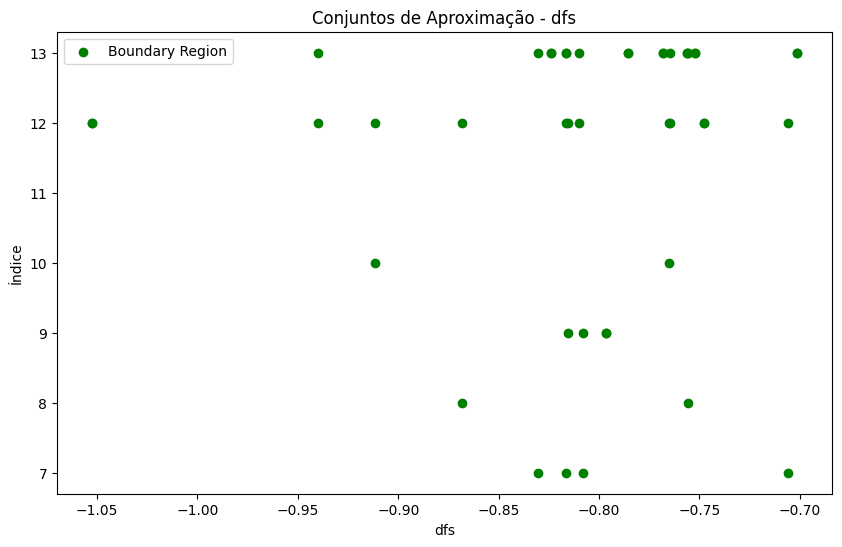

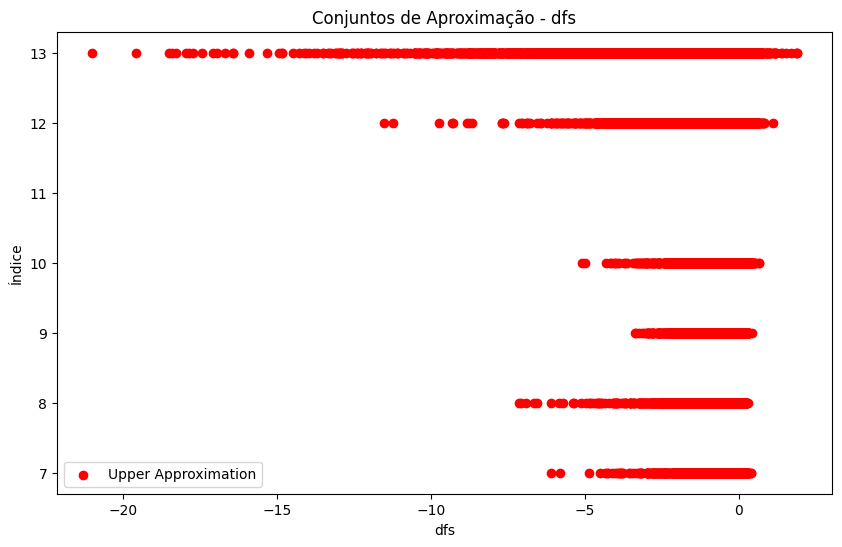

In [14]:
# Mapeando os índices para os atributos correspondentes
lower_approximation_attributes = df_dados.loc[lower_approx]
boundary_region_attributes = df_dados.loc[boundary_region]
upper_approximation_attributes = df_dados.loc[upper_approx]


# Exemplo de plot para um atributo (substitua 'Atributo_1' pelo atributo desejado)
plt.figure(figsize=(10, 6))
plt.scatter(lower_approximation_attributes['dfs'], lower_approximation_attributes['nchan'], label='Lower Approximation', color='blue')
#plt.scatter(boundary_region_attributes['dfs'], boundary_region_attributes['nchan'], label='Boundary Region', color='green')
#plt.scatter(upper_approximation_attributes['dfs'], upper_approximation_attributes['nchan'], label='Upper Approximation', color='red')
plt.xlabel('dfs')
plt.ylabel('Índice')
plt.title('Conjuntos de Aproximação - dfs')
plt.legend()
plt.show()

# Exemplo de plot para um atributo (substitua 'Atributo_1' pelo atributo desejado)
plt.figure(figsize=(10, 6))
plt.scatter(boundary_region_attributes['dfs'], boundary_region_attributes['nchan'], label='Boundary Region', color='green')
plt.xlabel('dfs')
plt.ylabel('Índice')
plt.title('Conjuntos de Aproximação - dfs')
plt.legend()
plt.show()

# Exemplo de plot para um atributo (substitua 'Atributo_1' pelo atributo desejado)
plt.figure(figsize=(10, 6))
plt.scatter(upper_approximation_attributes['dfs'], upper_approximation_attributes['nchan'], label='Upper Approximation', color='red')
plt.xlabel('dfs')
plt.ylabel('Índice')
plt.title('Conjuntos de Aproximação - dfs')
plt.legend()
plt.show()

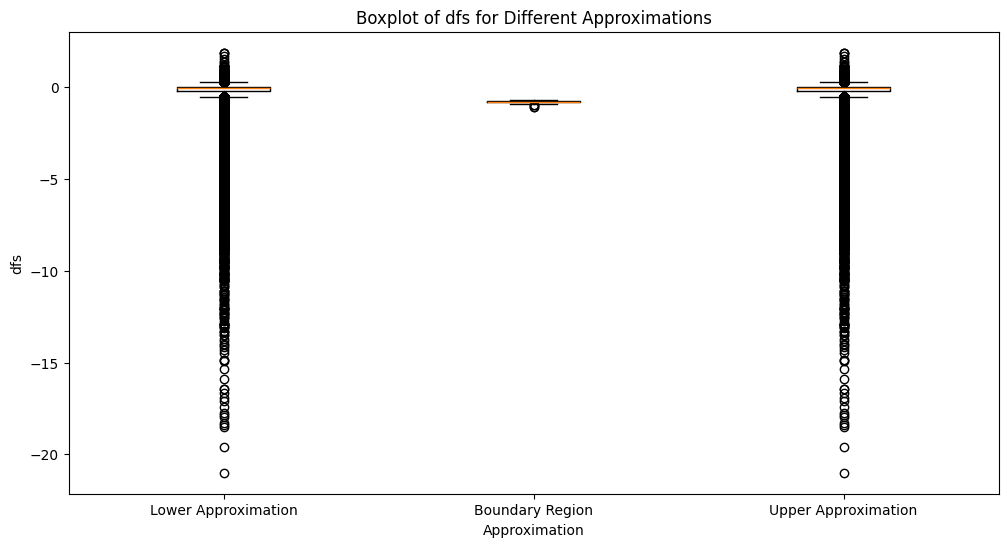

In [15]:
# Mapeando os índices para os atributos correspondentes
lower_approximation_attributes = df_dados.loc[lower_approx]
boundary_region_attributes = df_dados.loc[boundary_region]
upper_approximation_attributes = df_dados.loc[upper_approx]

# Boxplot para 'dfs'
plt.figure(figsize=(12, 6))
plt.boxplot(
    [
        lower_approximation_attributes['dfs'],
        boundary_region_attributes['dfs'],
        upper_approximation_attributes['dfs']
    ],
    labels=['Lower Approximation', 'Boundary Region', 'Upper Approximation']
)
plt.title('Boxplot of dfs for Different Approximations')
plt.ylabel('dfs')
plt.xlabel('Approximation')
plt.show()

In [16]:
# Análise dos Clusters
# Estatísticas descritivas para cada cluster
cluster_stats = df_dados.groupby('cluster').describe()

# Configurar o pandas para mostrar todas as linhas e colunas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(cluster_stats)

            nchan                                                         imp  \
            count       mean       std  min   25%   50%   75%   max     count   
cluster                                                                         
0        802723.0   9.750346  2.089626  7.0   8.0   9.0  12.0  13.0  802723.0   
1         38255.0  11.561391  1.873932  7.0  10.0  12.0  13.0  13.0   38255.0   

                                                                      \
             mean       std        min       25%       50%       75%   
cluster                                                                
0       -0.101466  0.256352  -1.151219 -0.190553 -0.036066  0.019563   
1       -1.874005  1.355148 -23.876337 -2.035705 -1.465118 -1.186235   

                        dfs                                           \
              max     count      mean       std        min       25%   
cluster                                                                
0        5.583921

/tmp/ipykernel_34641/1231500223.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=atributo, data=df_dados, palette='Set1')


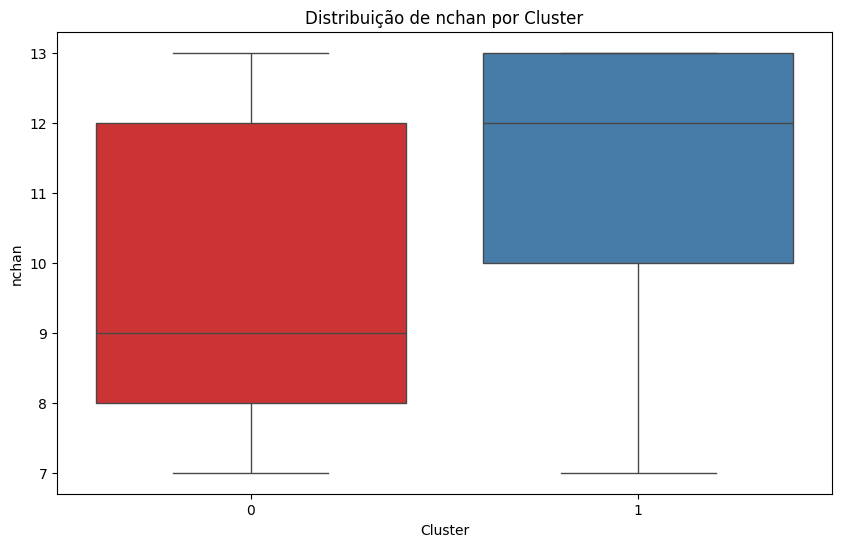

/tmp/ipykernel_34641/1231500223.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=atributo, data=df_dados, palette='Set1')


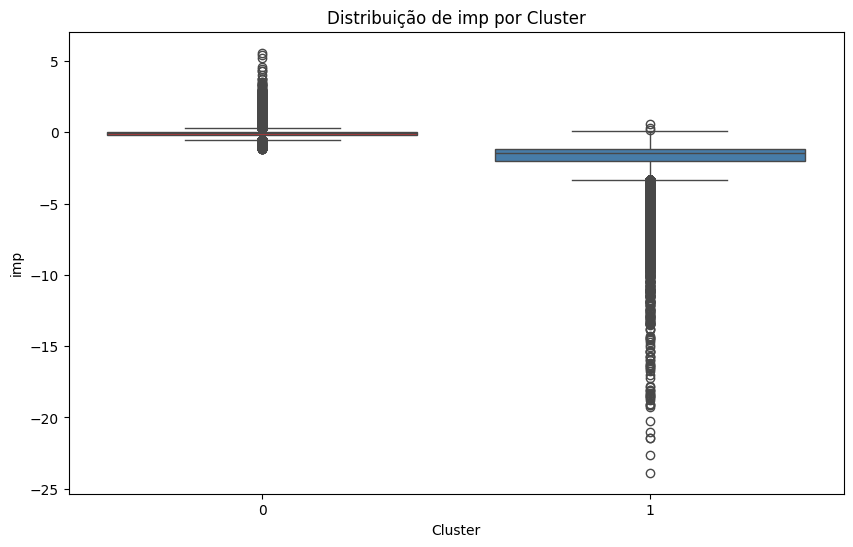

/tmp/ipykernel_34641/1231500223.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=atributo, data=df_dados, palette='Set1')


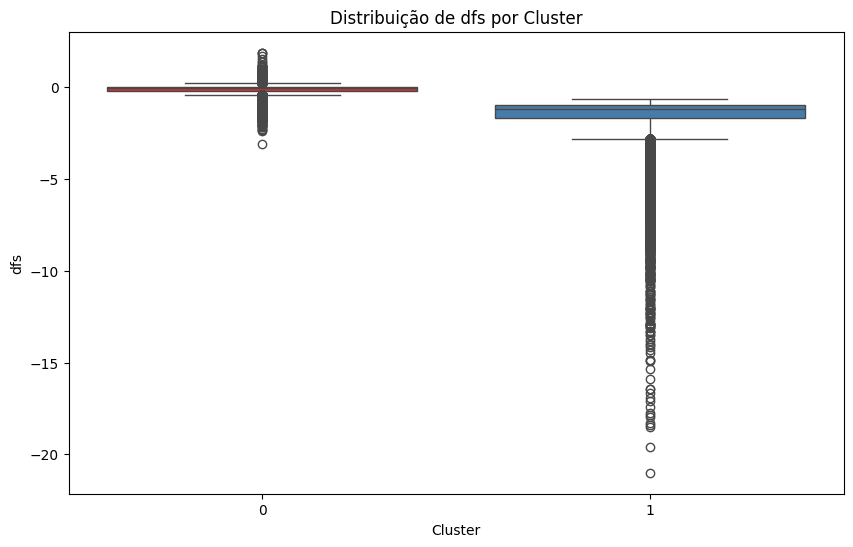

/tmp/ipykernel_34641/1231500223.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=atributo, data=df_dados, palette='Set1')


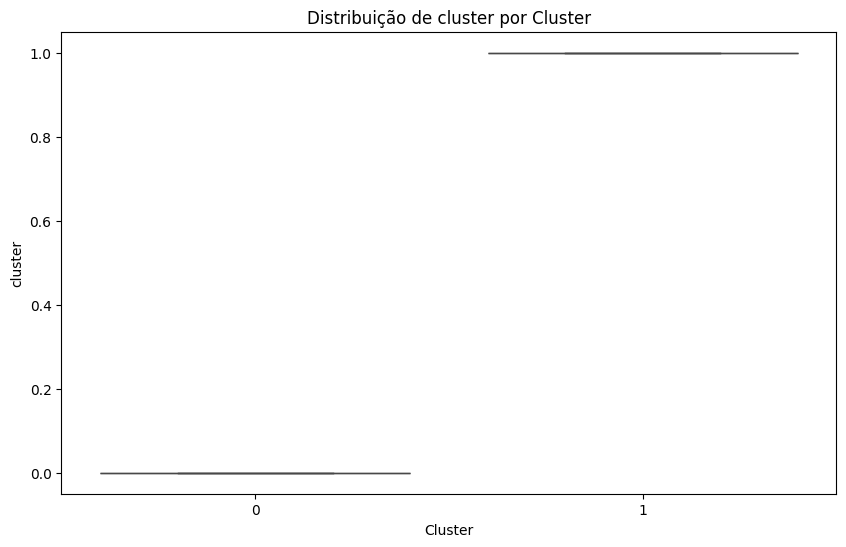

In [17]:
# Visualização da distribuição dos clusters para cada atributo
for atributo in df_dados.columns[:-1]:  # Excluindo a coluna 'cluster'
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=atributo, data=df_dados, palette='Set1')
    plt.title(f'Distribuição de {atributo} por Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(atributo)
    plt.show()

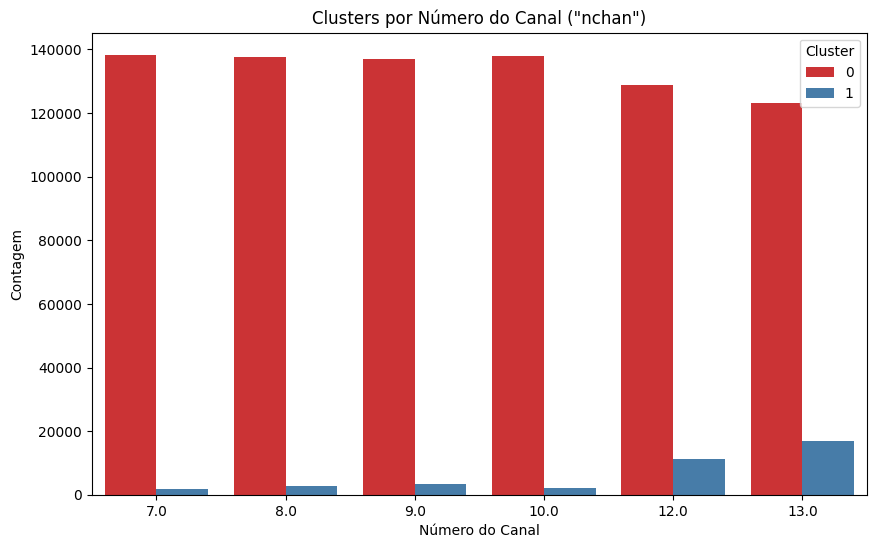

In [18]:
# Gráfico de barras para visualizar os clusters de acordo com o número do canal ("nchan")
plt.figure(figsize=(10, 6))
sns.countplot(data=df_dados, x='nchan', hue='cluster', palette='Set1')
plt.title('Clusters por Número do Canal ("nchan")')
plt.xlabel('Número do Canal')
plt.ylabel('Contagem')
plt.legend(title='Cluster')
plt.show()

In [19]:
# Tabela de contagem da frequência de ocorrência de cada canal para cada cluster
cluster_channel_count = df_dados.groupby(['cluster', 'nchan']).size().reset_index(name='count')

# Separar a contagem por cluster
cluster_0_count = cluster_channel_count[cluster_channel_count['cluster'] == 0]
cluster_1_count = cluster_channel_count[cluster_channel_count['cluster'] == 1]


# Ordenar as contagens de frequência de ocorrência de cada canal em ordem decrescente
cluster_0_count_sorted = cluster_0_count.sort_values(by='count', ascending=False)
cluster_1_count_sorted = cluster_1_count.sort_values(by='count', ascending=False)


# Visualização da tabela de contagem para cada cluster ordenada por contagem decrescente
print("Cluster 0:")
print(cluster_0_count_sorted)
print("\nCluster 1:")
print(cluster_1_count_sorted)


Cluster 0:
   cluster  nchan   count
0        0    7.0  138350
3        0   10.0  137968
1        0    8.0  137601
2        0    9.0  136931
4        0   12.0  128839
5        0   13.0  123034

Cluster 1:
    cluster  nchan  count
11        1   13.0  16971
10        1   12.0  11321
8         1    9.0   3309
7         1    8.0   2640
9         1   10.0   2269
6         1    7.0   1745


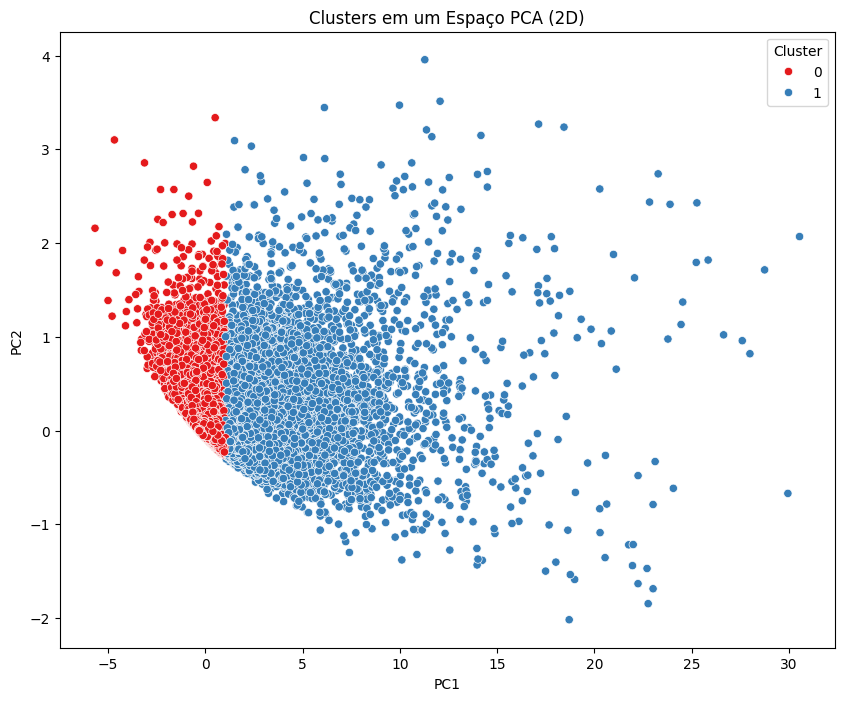

In [20]:
from sklearn.decomposition import PCA

# Aplicar PCA para reduzir a dimensionalidade dos dados para visualização
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_dados.drop(['cluster', 'nchan'], axis=1))

# Adicionar os clusters aos dados PCA
df_pca_with_cluster = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca_with_cluster['cluster'] = df_dados['cluster']

# Plotar os dados PCA coloridos por cluster
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_dados['cluster'], palette='Set1')
plt.title('Clusters em um Espaço PCA (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()

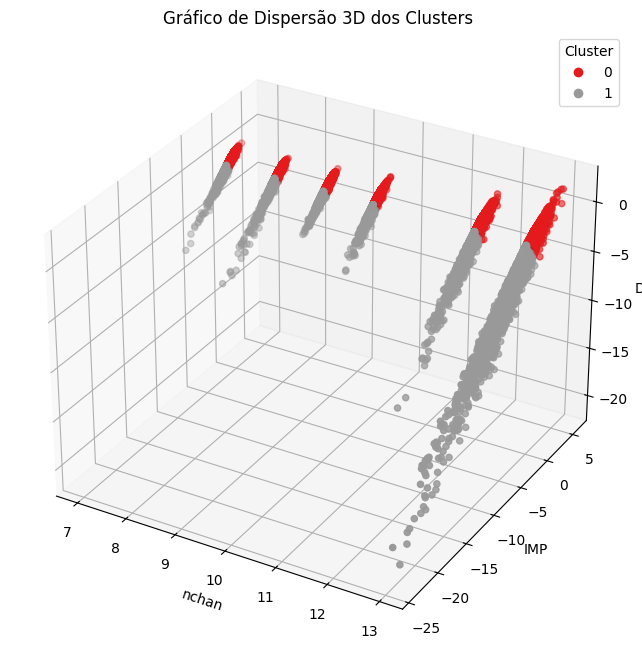

In [21]:
from mpl_toolkits.mplot3d import Axes3D

# Plotar os dados em um gráfico de dispersão 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Definir os eixos
x = df_dados['nchan']
y = df_dados['imp']
z = df_dados['dfs']

# Plotar os dados coloridos por cluster
scatter = ax.scatter(x, y, z, c=df_dados['cluster'], cmap='Set1')
ax.set_title('Gráfico de Dispersão 3D dos Clusters')
ax.set_xlabel('nchan')
ax.set_ylabel('IMP')
ax.set_zlabel('DFS')

plt.legend(*scatter.legend_elements(), title='Cluster')
plt.show()